In [3]:
import pickle 
import networkx as nx 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.cm as cm
from empath import Empath
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
import pyLDAvis
import pyLDAvis.gensim
import operator
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout
import random

In [4]:
def drawUserGraph(graph):
    ugraph = graph
    pos = graphviz_layout(ugraph, prog='neato')

    usr = ugraph.nodes()
    print len(usr)
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in ugraph:
        c = usr.index(node)
        colorMap.append(color[c])
        lls[node] = node
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    #
    nx.draw(ugraph,pos=pos ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

In [5]:
SW_Graphs_file = "/work/sagarj/Work/node2vec/graph/SW_TopicUgraphs.pkl"

In [6]:
SW_Graphs= pickle.load(open(SW_Graphs_file,'rb'))

In [7]:
len(SW_Graphs)

10157

In [8]:
BPUserDict = pickle.load(open("BpUserDict.pkl",'rb'))

In [9]:
BPUserDict

{'vj5co': [u'zombiemeds'],
 '1uv2vj': [],
 'fjatc': [u'dead_by_saturday'],
 '1x6boy': [u'throwawayacct424'],
 '97akw': [u'[deleted]', u'PossiblePerson'],
 '3ci391': [u'peanutpeepz'],
 's79sc': [u'fuck_usernames123'],
 '2tjz9s': [u'BearDidIt'],
 'b0mvj': [u'itisover'],
 '2u23m8': [],
 'e9cx6': [],
 'mae5s': [],
 'ci9lz': [u'dontwannabehere'],
 '24gto5': [u'youcaughtthelight'],
 'dwd3s': [],
 '29en0c': [u'Ingvarkarlsson', u'throwawaybcirl'],
 '37zjrf': [u'pathfinder89'],
 '1cz1sd': [u'KimmyJongJong'],
 '2nnud5': [],
 '2wo3jj': [u'throwitbitch1'],
 '1h1vqu': [u'nopointnow', u'rainbowtwinkies'],
 '16hiex': [u'griffin_desantos'],
 'e1hjc': [u'[deleted]'],
 'osxp1': [u'bleepitybleep', u'[deleted]', u'skekze'],
 '2kpspy': [u'bktolife', u'Hasherss', u'Starship_Fighter'],
 '2lhvye': [],
 '2at60d': [u'Jessica-EdgeBlade'],
 '1p4pqm': [u'TMRobotic'],
 'ylt41': [],
 '2hip0u': [u'Missing_love'],
 'xwu8q': [u'1800HEYGTFO'],
 '1dqizr': [u'buba_fett'],
 '1jg4bt': [u'dudelikeshismusic', u'[deleted]'],
 

In [10]:
bpnames = []
for k in BPUserDict:
    bpnames+=BPUserDict[k]

In [11]:
bpnames = list(set(bpnames))

In [12]:
# print bpnames

In [13]:
# drawUserGraph(SW_Graphs.keys()[8])

In [14]:
EmbeddingDir = "/work/sagarj/Work/node2vec/emb_V2/"

embeddings = os.listdir(EmbeddingDir)

embeddingDict = {}
for emb in embeddings:
    embId = emb.split('.')[0]
    embeddingDict[embId] = EmbeddingDir + emb

In [15]:
# embeddings=pd.read_csv("/work/sagarj/Work/node2vec/emb_V2/topicGiantGraph.emb",sep=' ',skiprows=1,header=None)

# len(embeddings)

In [16]:
commonKeys = [k for k in BPUserDict if k in SW_Graphs]

In [17]:
len(commonKeys)

10157

In [18]:
# embeddings.head()

# embDict = {}
# for i in range(len(embeddings)):
#     embDict[embeddings.iloc[i][0]] = np.asarray(embeddings.iloc[i][1:],dtype='float')                                         
    

In [20]:
# embDict['turdsandwich12345678']

In [21]:
# embDict['SQLwitch']

In [29]:
embDict = {}
for k in commonKeys:
    if(len(SW_Graphs[k].nodes()) > 1):
        embDict[k] = {}
        e = pd.read_csv(embeddingDict[k],sep=' ',skiprows=1,header=None)
        for i in range(len(e)):
            embDict[k][e.iloc[i][0]] = np.asarray(e.iloc[i][1:])

In [30]:
len(embDicts)

8128

In [40]:
embDicts[embDicts.keys()[1]]

{'Philofelinist': array([-0.007451, -0.039577, 0.096584, -0.166533, -0.0021579999999999998,
        0.061472000000000006, -0.042688, -0.121477, -0.017478, -0.11796,
        0.11326199999999999, -0.046428, 0.016294, -0.001009, -0.049175,
        -0.039545, 0.020505000000000002, 0.060828, -0.032622000000000005,
        0.070774, -0.024731, -0.13097899999999998, 0.096498, -0.163131,
        -0.050852999999999995, -0.079599, 0.044863, 0.077044, -0.090964,
        0.074741, -0.042436, 0.013685, 0.029639, 0.011420999999999999,
        -0.068893, -0.009533, -0.12209500000000001, 0.085025,
        -0.09513300000000001, -0.053116, -0.016587, -0.072737, -0.02054,
        0.071825, -0.11534100000000001, 0.060386, 0.009506, -0.030099,
        0.08304199999999999, 0.10599000000000001, -0.070561, -0.071675,
        0.086427, -0.027944, 0.002414, 0.044247, -0.057061,
        -0.009243000000000001, 0.053548, -0.026466000000000003, -0.133697,
        -0.109926, 0.135681, -0.059783, -0.072025, -0.076788

In [31]:
# with open("SW_Whole_EmbeddingDictionary.pkl",'wb') as f:
#     pickle.dump(embDict,f)

In [32]:
nx.closeness_centrality(SW_Graphs[SW_Graphs.keys()[1]].to_undirected())

{u'Philofelinist': 0.5,
 u'TheDeluxeScar': 0.4444444444444444,
 u'[deleted]': 0.5,
 u'sadsexthrowaway': 0.8,
 u'tryify': 0.6666666666666666}

In [43]:
BPFeats=[]
SPFeats=[]
medianClusteringBP = []
medianClusteringSP = []
BPsizes = []
SPsizes = []
for k in embDict:
    medClustering = np.median(nx.closeness_centrality(SW_Graphs[k].to_undirected()).values())
    if len(BPUserDict[k]) > 0:
        users = SW_Graphs[k].nodes()
        i = random.choice(users)
        if(len(SW_Graphs[k].nodes()) > 1):
            medianClusteringBP.append(medClustering)
        for i in BPUserDict[k]:
            if i in embDict[k]:
                a = np.concatenate((embDict[k][i], np.array([1])))
                BPFeats.append(a)
            else:
                print "user not found in the embeddings"
    else:
        for i in SW_Graphs[k].nodes():
            if(len(SW_Graphs[k].nodes()) > 1):
                medianClusteringSP.append(medClustering)
            if i in embDict[k]:
                a = np.concatenate((embDict[k][i], np.array([0])))
                SPFeats.append(a)
            else:
                print "user not found in the embeddings"

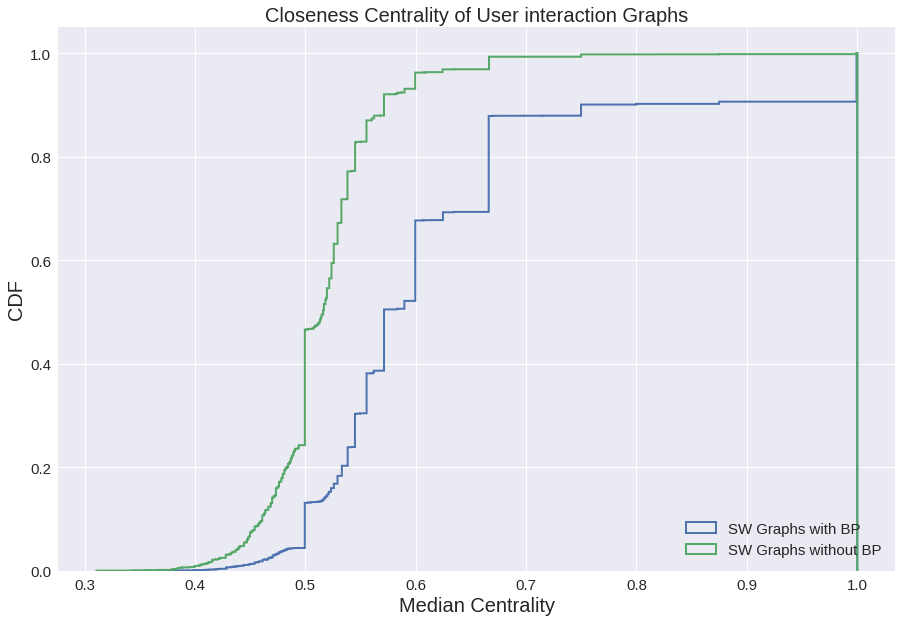

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(medianClusteringBP, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(medianClusteringSP, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Closeness Centrality of User interaction Graphs", fontsize = 20)
plt.xlabel("Median Centrality",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['SW Graphs with BP','SW Graphs without BP'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [45]:
len(BPFeats) , len(SPFeats)

(11018, 25951)

In [46]:
sampledSPFeats = random.sample(SPFeats,len(BPFeats))
# sampledBPFeats = random.sample(BPFeats,len(SPFeats))

totFeats = BPFeats + sampledSPFeats
# totFeats = sampledBPFeats + SPFeats
print len(totFeats)


22036


In [47]:
featMatrix = np.asmatrix(totFeats,dtype=float)
print featMatrix.shape
np.random.shuffle(featMatrix)

(22036, 129)


In [48]:
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [49]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(featMatrix[:,:-1], featMatrix[:,-1], test_size=0.2, random_state=9876)

clfRF = RandomForestClassifier(n_estimators=1000 , max_features = 'sqrt', random_state = 9386, n_jobs=12)
clfRF.fit(X_train, y_train)
RF_predict = clfRF.predict(X_test)

In [50]:
precision , recall , fscore , _ = precision_recall_fscore_support(y_test, RF_predict, average='binary')

print precision,recall,fscore

accuracy_score(y_test , RF_predict)

0.914533622559653 0.9768303985171455 0.9446560609455524


0.9439655172413793

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(featMatrix[:,:-1])

In [53]:
print 'Explained variation per principal component: {}'.format(pca.explained_variance_ratio_)

Explained variation per principal component: [0.10082673 0.01364065]


In [135]:
import time

from sklearn.manifold import TSNE

n_sne = 3000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=300)
tsne_results = tsne.fit_transform(featMatrix[:10000,:-1])

print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start) 

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 5646
[t-SNE] Computed conditional probabilities for sample 2000 / 5646
[t-SNE] Computed conditional probabilities for sample 3000 / 5646
[t-SNE] Computed conditional probabilities for sample 4000 / 5646
[t-SNE] Computed conditional probabilities for sample 5000 / 5646
[t-SNE] Computed conditional probabilities for sample 5646 / 5646
[t-SNE] Mean sigma: 0.086158
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.951708
[t-SNE] Error after 300 iterations: 0.951708
t-SNE done! Time elapsed: 107.541857958 seconds


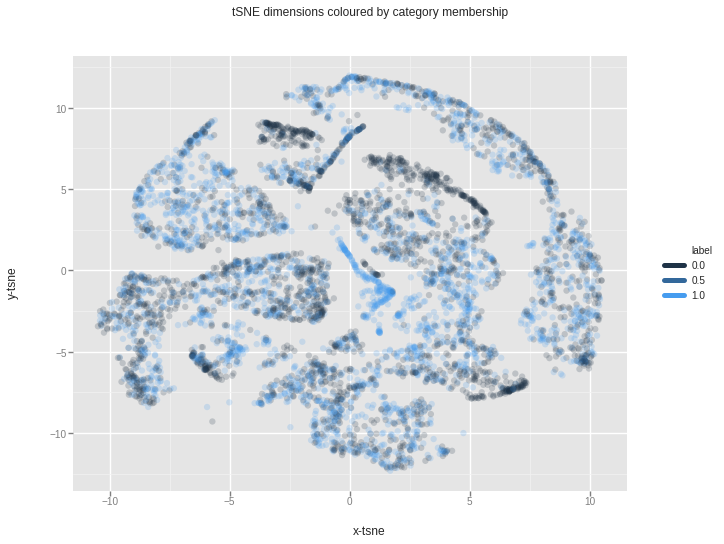

<ggplot: (8778942519185)>

In [136]:
from ggplot import *
df_tsne = pd.DataFrame()
df_tsne['x-tsne'] = tsne_results[:10000,0]
df_tsne['y-tsne'] = tsne_results[:10000,1]
df_tsne['label'] = featMatrix[:10000,-1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) + geom_point(size=40,alpha=0.2) + ggtitle("tSNE dimensions coloured by category membership")
chart

In [335]:
SW_AllGraph= pickle.load(open("/work/sagarj/Work/node2vec/graph/SW_GiantTopicGraph.pkl",'rb'))

In [123]:
def findMedianCentrality(graph):
    return np.median(nx.closeness_centrality(graph.to_undirected()).values())

def findTopicalEdgeWeight(graph):
    edges = graph.edges(data=True)
    meantopical = float(sum([e[2]['weight'] for e in edges]))/float(len(edges))
    return meantopical

def findMaxWeightSpread(graph):
    edges = graph.edges(data=True)
    edgeTopics = [e[2]['weight'] for e in edges]
    return (float(max(edgeTopics)) - float(min(edgeTopics)))

def findMaxTopicSpread(graph):
    topicSpreads = []
    for u,v,d in graph.edges(data=True):
        if graph.has_edge(v,u):
            topicSpread = d['weight'] - graph[v][u]['weight']
            topicSpreads.append(topicSpread)
    if len(topicSpreads) > 0:
        ans = (float(max(topicSpreads)) - float(min(topicSpreads)))
    else:
        ans = 0.0
    return ans
    

In [124]:
k = SW_Graphs.keys()[34]
print findMedianCentrality(SW_Graphs[k]) ,findTopicalEdgeWeight(SW_Graphs[k]), findMaxWeightSpread(SW_Graphs[k]) , findMaxTopicSpread(SW_Graphs[k])

0.6666666666666666 0.746933621934 0.91626984127 0.85


In [125]:
BPNWFeats=[]
SPNWFeats=[]
for k in BPUserDict:
    if len(SW_Graphs[k].edges()) > 0:
        a= [findMedianCentrality(SW_Graphs[k]), findTopicalEdgeWeight(SW_Graphs[k]) , findMaxWeightSpread(SW_Graphs[k]),findMaxTopicSpread(SW_Graphs[k])]
        if len(BPUserDict[k]) > 0:
            a.append(1.0)
            BPNWFeats.append(a)
        else:
            a.append(0.0)
            SPNWFeats.append(a)

In [126]:
len(BPNWFeats) , len(SPNWFeats)

(7331, 2823)

In [131]:
sampledBPFeats = random.sample(BPNWFeats,len(SPNWFeats))
# sampledBPFeats = random.sample(BPFeats,len(SPFeats))

totFeats = sampledBPFeats + SPNWFeats
print len(totFeats)


5646


In [132]:
featMatrix = np.asmatrix(totFeats,dtype=float)
print featMatrix.shape
np.random.shuffle(featMatrix)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(featMatrix[:,:-1], featMatrix[:,-1], test_size=0.2, random_state=9876)

clfRF = RandomForestClassifier(n_estimators=1000 , max_features = 'sqrt', random_state = 9386, n_jobs=12)
clfRF.fit(X_train, y_train)
RF_predict = clfRF.predict(X_test)

precision , recall , fscore , _ = precision_recall_fscore_support(y_test, RF_predict, average='binary')

print precision,recall,fscore

accuracy_score(y_test , RF_predict)

(5646, 5)
0.6622734761120264 0.7269439421338155 0.6931034482758621


0.6849557522123894

In [336]:
# len(SW_AllGraph.nodes())

# selfLoops =  SW_AllGraph.selfloop_edges()

# SW_AllGraph.remove_edges_from(selfLoops)

# rich_club = nx.rich_club_coefficient(SW_AllGraph.to_undirected(), normalized=True  , Q = 100 )

31049

In [ ]:
rich_club = pickle.load(open("RichCLubSWALL.pkl",'rb'))

In [ ]:
rich_club_values = [rich_club[k] for k in rich_club if k < 600]

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.plot(rich_club_values,'b-',linewidth = 2.0)
plt.title("Unweighted Normalized Rich Club coefficients for Suicide watch SubReddit", fontsize = 20)
plt.xlabel("Degree",fontsize = 20)
plt.ylabel("Coefficient value",fontsize = 20)
#plt.legend(['pMatrix' , 'mMatrix'], loc='upper left')
plt.yticks(np.arange(0,1.2,0.1))
plt.xticks(np.arange(0,650 ,20),rotation=45 ,fontsize=12)
# plt.grid()
plt.show()

In [ ]:
# with open("RichCLubSWALL.pkl",'wb') as f: 
#     pickle.dump(rich_club,f)

In [343]:
SW_clustering = nx.clustering(SW_AllGraph.to_undirected())

In [344]:
SW_degrees = nx.degree(SW_AllGraph)

In [345]:
BP_degree = [SW_degrees[k]+1 for k in SW_degrees if k in bpnames]
BL_degree = random.sample([SW_degrees[k]+1 for k in SW_degrees if k not in bpnames],len(BP_degree))

In [346]:
# print SW_clustering

In [347]:
BP_clustering = [SW_clustering[k] for k in SW_clustering if k in bpnames]
BL_clustering = random.sample([SW_clustering[k] for k in SW_clustering if k not in bpnames],len(BP_clustering))

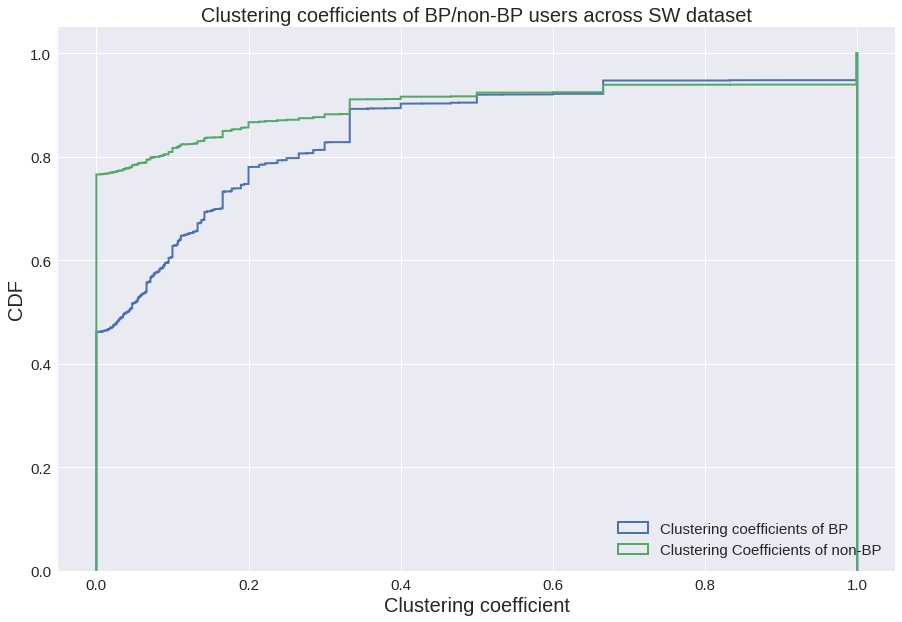

In [348]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BP_clustering, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(BL_clustering, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
plt.title("Clustering coefficients of BP/non-BP users across SW dataset", fontsize = 20)
plt.xlabel("Clustering coefficient",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Clustering coefficients of BP','Clustering Coefficients of non-BP'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

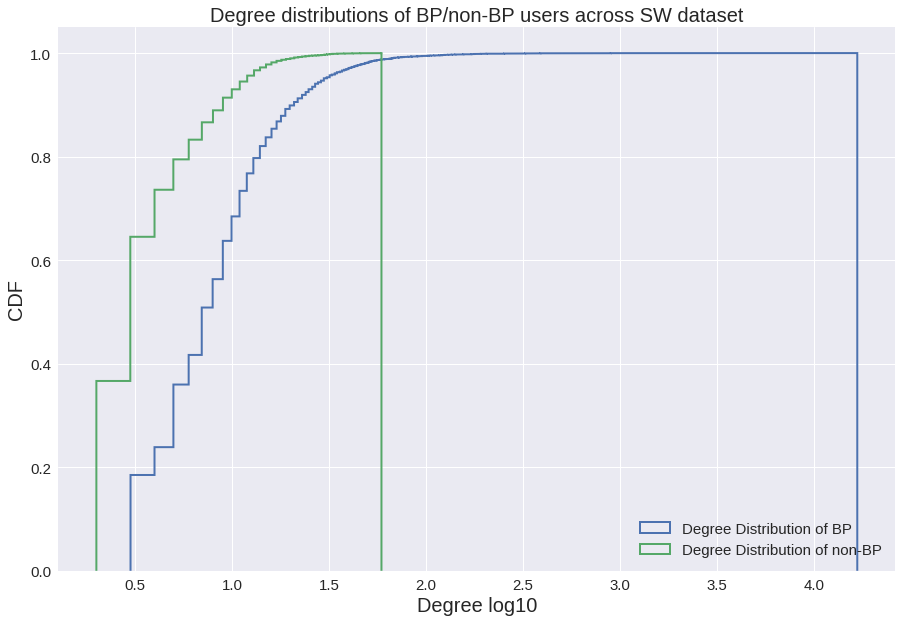

In [349]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(np.log10(BP_degree), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(BL_degree), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Degree distributions of BP/non-BP users across SW dataset", fontsize = 20)
plt.xlabel("Degree log10",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Degree Distribution of BP','Degree Distribution of non-BP'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()